Loading required packages:

In [1]:
import pandas as pd
import numpy as np
import mne
import os

import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from scipy import signal
from scipy.signal import lfilter
from mne.time_frequency import tfr_morlet

EEG Recording Metadata:


* BaseFileName:0014;
* FileOrder:1;

* StartSample:0;

* HardwareChannelNumbers:66;

* Channels:1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,65;

* ChannelType:,,,,,,,,,,,,,,,,,,,,,,,,,,,,;

* ChannelName:Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Ch9,Ch10,Ch11,Ch12,Ch13,Ch14,Ch15,Ch16,Ch17,Ch18,Ch19,Ch20,Ch21,Ch22,Ch23,Ch24,Ch25,Ch26,Ch27,Ch28,Event1;

* ChannelSampleRate:1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000;

* ChannelResolution:24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24;

* ChannelGain:4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4;

* ChannelRange:9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9;

Notes:

Epoching: Dividing the continuous data into smaller segments, called epochs, that correspond to specific events or conditions. For example, the data can be divided into epochs corresponding to different tasks or stimuli.

Time-frequency analysis: Time-frequency analysis techniques, such as the Fourier transform or the wavelet transform are used to analyze the frequency content of EEG data over time. These techniques can be used to identify patterns or changes in the spectral power of the EEG signal that are related to specific events or conditions.

Tipically involves decomposing the signal into different frequency bands over time. This can be useful for studying how brain activity changes over time, and can be helpful in identifying specific patterns or changes in brain activity.

There are several methods for performing time-frequency analysis in Python, including:

Short-time Fourier transform (STFT): This method involves dividing the signal into small time intervals (called "windows") and performing a Fourier transform on each window to obtain the frequency content.

Wavelet transform: This method decomposes the signal into frequency bands using wavelets, which are specialized functions that are well-suited for analyzing time-varying signals.

Autoregressive model: This method involves fitting an autoregressive model to the data and using the model parameters to estimate the time-varying spectral content of the signal.

* To perform STFT analysis, scipy.signal.stft function can be used. 
* To perform wavelet analysis, use the pywt.cwt function from the PyWavelets library. 
* To fit an autoregressive model, use the statsmodels.tsa.ar_model.AR function from the statsmodels library.

EEG data often contains artifacts, such as eye blinks or muscle movements, that can affect the results of the time-frequency analysis. To remove these artifacts, it is usually necessary to pre-process the data using techniques such as artifact rejection or independent component analysis.

Feature extraction: Extract relevant features or characteristics of the signal that can be used to classify or analyze the data. For example, features such as the mean, standard deviation, or power spectral density of the signal within specific frequency bands or epochs can be extracted.

Classification: Once relevant features have been extracted ML techniques to classify the data ca be applied. For example, using supervised learning algorithms such as support vector machines or random forests to classify the data into different classes or groups.

Event-related potentials (ERPs) are changes in the electrical activity of the brain that are time-locked to specific events or stimuli. They are often used to study cognitive processes such as attention, perception, memory, and they can be measured using EEG.

To detect ERPs in EEG data:

* Preprocess the data: Preprocessing the data involves steps such as filtering, epoching, and removing artifacts. This is important to ensure that the data is clean and ready for analysis.

* Average the data: To detect ERPs, you typically need to average the EEG data across multiple trials or repetitions of the same event or stimulus. This helps to reduce the noise in the data and enhance the signal-to-noise ratio.

* Identify the ERP components: ERPs are often characterized by specific components or waves that are associated with different cognitive processes or brain regions. These components can be identified by their shape, amplitude, and latency.

* Analyze the data: Once the ERP components are idetnfieid, data can be analyzed to answer specific research questions. For example - compare the amplitudes or latencies of the ERP components between different conditions or groups, or use ML to classify the data based on the ERP components.

Entropy

* The Shannon entropy of a signal is a measure of the randomness or uncertainty of the signal. A signal with high Shannon entropy is considered more random or unpredictable, while a signal with low Shannon entropy is considered more predictable.

* Shannon entropy can be used to identify patterns or trends in the data that may not be immediately visible. For example, if the Shannon entropy of a particular EEG channel is consistently high over time, it may indicate that there is a high level of variability or unpredictability in the data. On the other hand, if the Shannon entropy is consistently low, it may indicate that there are clear patterns or trends in the data.

* Shannon entropy can be used on each EEG channel to identify patterns or trends in the data and understand how the brain is responding to different stimuli or tasks. hannon entropy can also be used to compare the data from different channels or subjects and see how they differ in terms of variability and predictability.

Manually computing the derivative within the EVENT1 column and applying a rolling window function over it

In [2]:
df = pd.read_csv("data/0014.txt", sep='\t', index_col=False, header=0)

# Apply the Noth filter
sampling_rate = 1000 # samples per second
notch_freq = 50 # Hz
notch_bw = 2 # Hz

eeg_mask = df.columns != 'EVENT1'

b, a = signal.iirnotch(notch_freq, notch_bw, sampling_rate)
filtered_data = signal.lfilter(b, a, df.loc[:, eeg_mask], axis=0)
filtered_df = df.copy()
filtered_df.loc[:, eeg_mask] = filtered_data

# Calculate the difference between consecutive values in the "EVENT1" column
filtered_df['derivative'] = filtered_df['EVENT1'].diff()

# Define the window size (in number of rows)
window_size = 5
rolling_window = filtered_df['derivative'].rolling(window_size)
filtered_df['window'] = rolling_window.mean()

In [3]:
# Check the newly created derivative and window columns and apply a filter to exclude NaN and 0
filtered_df.iloc[:, -2:][((filtered_df.iloc[:, -2:].notna()) & (filtered_df.iloc[:, -2:].ne(0))).all(1)]

derivative  window
33402         16.0     3.2
33405          8.0     4.8
33408         32.0     8.0
33435         64.0    12.8
53656        -96.0   -19.2
...            ...     ...
253239        64.0    12.8
262762       -64.0   -12.8
262777       -32.0    -6.4
262780       -16.0    -9.6
262781        -8.0   -11.2

[431 rows x 2 columns]

In [4]:
# Calculate the counts of each unique value in the window column
print(filtered_df.value_counts("window"))

window
 0.0     273821
 12.8       405
 3.2        403
 6.4        403
-22.4       297
-19.2        61
-3.2         61
-12.8        47
-9.6         43
-6.4          3
-4.8          3
 4.8          2
 8.0          2
-11.2         1
-1.6          1
 1.6          1
dtype: int64


In [5]:
# Calculate the counts of each unique value in the derivative column
print(filtered_df.value_counts('derivative'))

derivative
 0.0     275127
 16.0        81
 32.0        81
 64.0        81
-16.0        62
-64.0        43
-96.0        38
-32.0        24
-48.0        19
-8.0          1
 8.0          1
dtype: int64


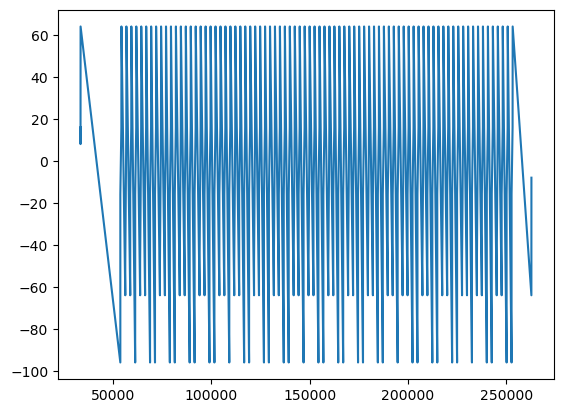

In [6]:
der = filtered_df[filtered_df['derivative'] != 0]
# Plot the filtered series
der['derivative'].plot()
plt.show()

# Attempting MNE conversion

* Starting fresh with preparing the raw & info MNE objects

In [169]:
data = pd.read_csv("data/0014.txt", sep='\t', index_col=False, header=0)

sampling_rate = 1000 # signal samples per second
notch_freq = 50 #Hz
notch_bw = 2 #Hz

eeg_mask = data.columns != 'EVENT1'

b, a = signal.iirnotch(notch_freq, notch_bw, sampling_rate)
filtered_data = signal.lfilter(b, a, data.loc[:, eeg_mask], axis=0)
filtered_df = data.copy()
filtered_df.loc[:, eeg_mask] = filtered_data

# extract the data as a numpy array for faster processing
eeg_data = filtered_df.values[:, ].T

# creating an MNE info object to define and store metadata, including stimuli 
n_channels = eeg_data.shape[0]
ch_names = ['CH{}'.format(i) for i in range(1, n_channels)] + ['EVENT1']
ch_types = ['eeg'] * (len(ch_names) - 1) + ['stim']
sfreq = 1000
info = mne.create_info(ch_names, sfreq, ch_types)

# create an MNE RawArray object
raw = mne.io.RawArray(eeg_data, info)

# print information about the data
print(raw.info)

Creating RawArray with float64 data, n_channels=29, n_times=275559
    Range : 0 ... 275558 =      0.000 ...   275.558 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: CH1, CH2, CH3, CH4, CH5, CH6, CH7, CH8, CH9, CH10, CH11, CH12, ...
 chs: 28 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 29
 projs: []
 sfreq: 1000.0 Hz
>


# This worked!!!

In [180]:
# load the EEG data using pandas
data = pd.read_csv("data/0014.txt", sep='\t', index_col=False, header=0)

# define the preprocessing parameters
sampling_rate = 1000 # signal samples per second
notch_freq = 50 #Hz
notch_bw = 2 #Hz

# apply notch filter to remove 50 Hz line noise
eeg_mask = data.columns != 'EVENT1'
b, a = signal.iirnotch(notch_freq, notch_bw, sampling_rate)
filtered_data = signal.lfilter(b, a, data.loc[:, eeg_mask], axis=0)
filtered_df = data.copy()
filtered_df.loc[:, eeg_mask] = filtered_data

# extract the data as a numpy array for faster processing
eeg_data = filtered_df.values[:, ].T

# specify the electrode names and positions
n_channels = eeg_data.shape[0]
ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2', 'A1', 'A2', 'FC5', 'FC1', 'FC2', 'FC6', 'CP5', 'CP1', 'EVENT1']
#ch_types = ['eeg'] * 28 + ['stim']
ch_types = ['eeg'] * (len(ch_names) - 1) + ['stim']
sfreq = 1000
info = mne.create_info(ch_names, sfreq, ch_types)

montage = mne.channels.make_standard_montage('standard_1020')
montage_dict = montage.get_positions()
for i in range(n_channels):
    if ch_names[i] in montage_dict:
        info['chs'][i]['loc'] = montage_dict[ch_names[i]]

# create an MNE RawArray object
raw = mne.io.RawArray(eeg_data, info)

# set the montage
raw.set_montage(montage)

# print information about the data
print(raw.info)

Creating RawArray with float64 data, n_channels=29, n_times=275559
    Range : 0 ... 275558 =      0.000 ...   275.558 secs
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T7, C3, Cz, C4, T8, P7, P3, Pz, ...
 chs: 28 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 31 items (3 Cardinal, 28 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 29
 projs: []
 sfreq: 1000.0 Hz
>


* Examining the stimuli:
    
    * MNE detects 244 events in total but in fact, we are interested in the events that are part of the 120 group only.

In [181]:
events = mne.find_events(raw, stim_channel='EVENT1')
print(events[:5])

244 events found
Event IDs: [ 16  24  56 120]
[[33402     0    16]
 [33405    16    24]
 [33408    24    56]
 [33435    56   120]
 [54176     8    24]]


In [184]:
# Applying additional high and low band filters over the signal native to the MNE package
ram = raw.filter(l_freq=1, h_freq=None)
raw = raw.filter(l_freq=None, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 sec)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.2s finished




* Now we can create the epoch object using the events that are part of the 120 group



In [185]:
events = mne.find_events(raw, stim_channel='EVENT1', shortest_event=0.1, verbose=True, initial_event=True, uint_cast=True)
event_id = 120 #Event IDs: [ 16  24  56 120]
tmin = -1  # start time before the event
tmax = 1  # end time after the event
baseline = None  # no baseline correction

# Create the epochs
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=baseline, preload=True)
print(epochs)

244 events found
Event IDs: [ 16  24  56 120]
Not setting metadata
81 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 81 events and 2001 original time points ...
0 bad epochs dropped
<Epochs |  81 events (all good), -1 - 1 sec, baseline off, ~35.9 MB, data loaded,
 '120': 81>


In [187]:
event_types = [16, 24, 56, 120]

# Count the number of occurrences of each event type
for event_type in event_types:
    count = np.count_nonzero(events[:, -1] == event_type)
    print("Event type", event_type, "found", count, "times.")

Event type 16 found 1 times.
Event type 24 found 81 times.
Event type 56 found 81 times.
Event type 120 found 81 times.


* Interesting remark here is that there are 81 instead of 80 events (as per the number in the stimuli file). This could be due to some artifact and unfortunately I am unable to locate the root cause of this.

In [188]:
# call the epoch opbject to see the details as defined by MNE
epochs

<Epochs |  81 events (all good), -1 - 1 sec, baseline off, ~35.9 MB, data loaded,
 '120': 81>

# Basic visualization

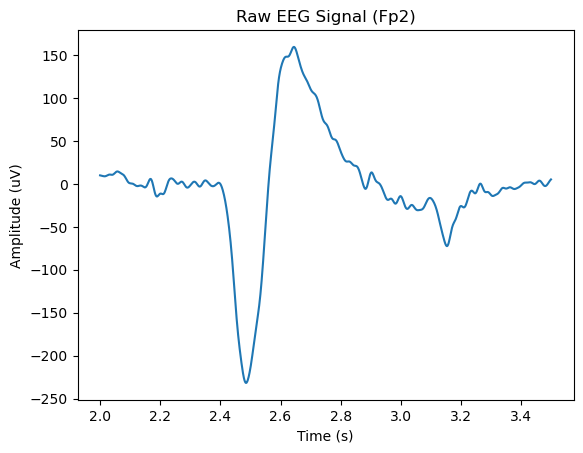

In [189]:
# pick a channel to plot
channel_index = 1
channel_name = raw.ch_names[channel_index]

# select a time range to plot (divide by 1000 to convert to seconds)
start_time = 2000 # change these values to see how the signal changes over time
end_time = 3500

# extract the data for the selected channel and time range
data, times = raw[channel_index, start_time:end_time]

# plot the data
fig, ax = plt.subplots()
ax.plot(times, data.T)
ax.set(title=f'Raw EEG Signal ({channel_name})', xlabel='Time (s)', ylabel='Amplitude (uV)')
plt.show()

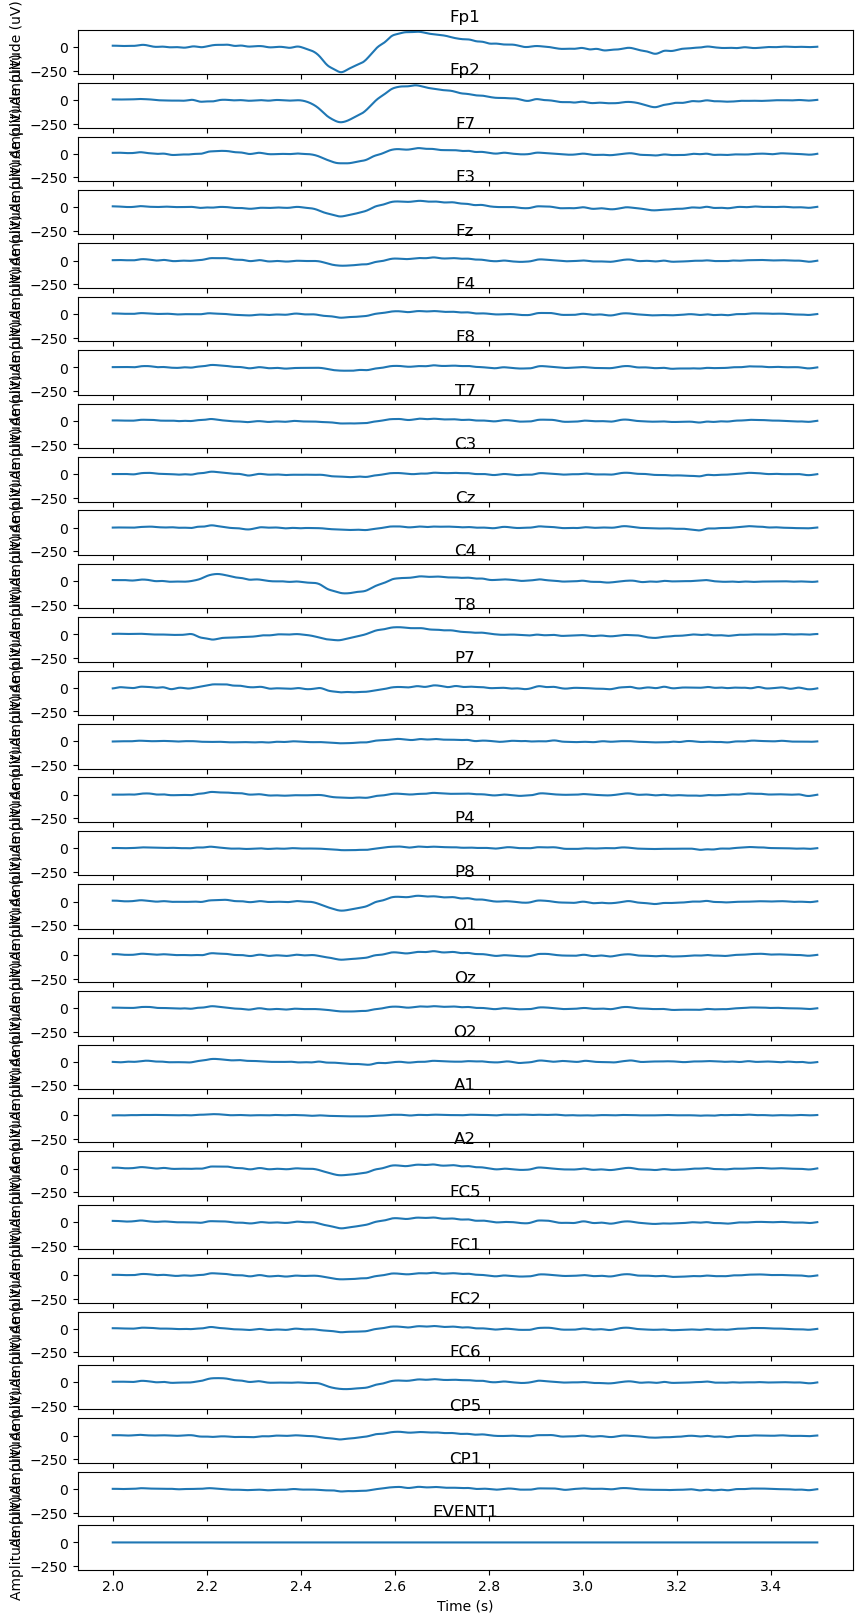

In [190]:
# Plot all channels sequentially
start_time = 2000
end_time = 3500

# plot all channels
fig, axes = plt.subplots(nrows=len(raw.ch_names), sharex=True, sharey=True, figsize=(10, 20))
for channel_index, channel_name in enumerate(raw.ch_names):
    # extract the data for the selected channel and time range
    data, times = raw[channel_index, start_time:end_time]
    # plot the data
    axes[channel_index].plot(times, data.T)
    axes[channel_index].set(title=channel_name, ylabel='Amplitude (uV)')
axes[-1].set(xlabel='Time (s)')
plt.show()

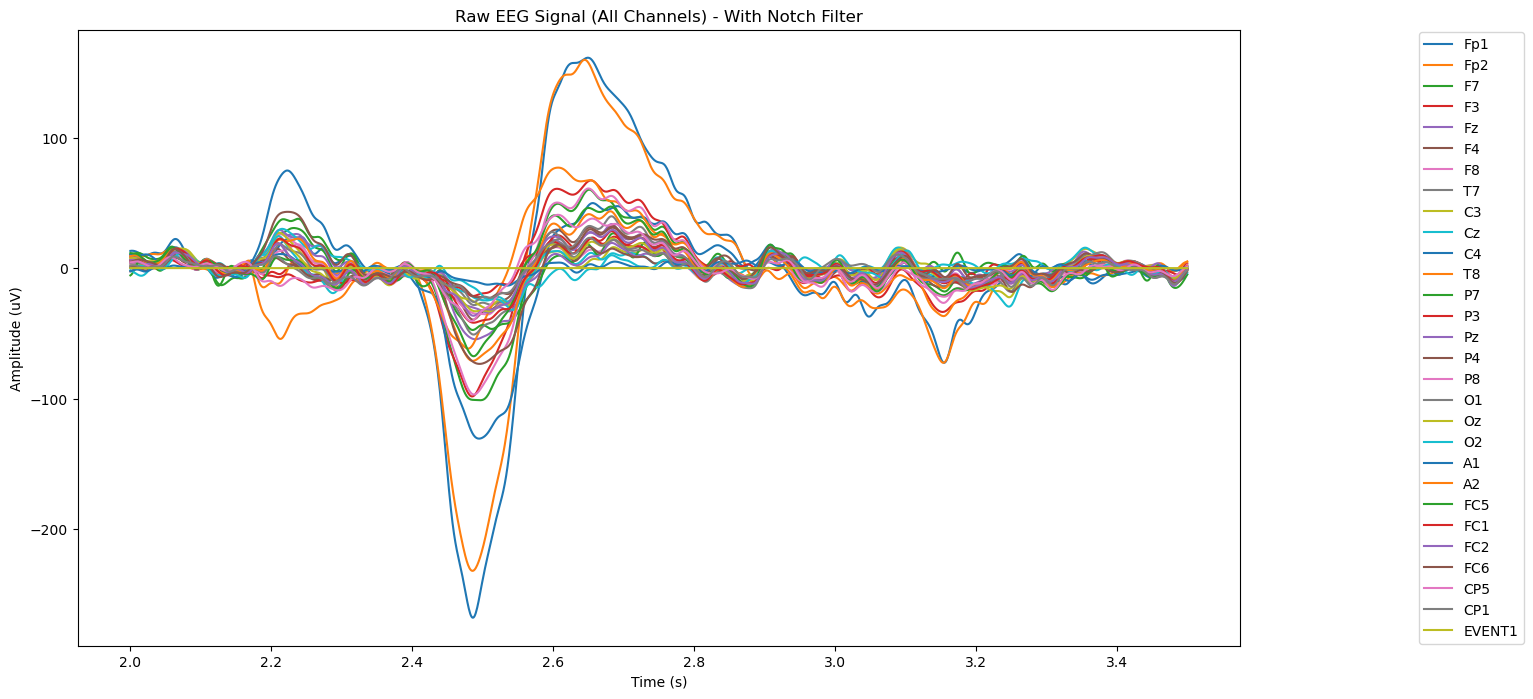

In [192]:
# Stack all channels on top of eachother
start_time = 2000
end_time = 3500

data, times = raw[:, start_time:end_time]

fig, ax = plt.subplots(figsize=(15, 8))
for i in range(data.shape[0]):
    ax.plot(times, data[i, :], label=raw.ch_names[i])
ax.set(title='Raw EEG Signal (All Channels) - With Notch Filter', xlabel='Time (s)', ylabel='Amplitude (uV)')
ax.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.show()
plt.close(fig)

# Interactive plot

In [193]:
start_time = 2000
end_time = 3500

data, times = raw[:, start_time:end_time]

traces = []
for i, channel_name in enumerate(raw.ch_names):
    trace = go.Scatter(x=times, y=data[i], name=channel_name)
    traces.append(trace)

layout = go.Layout(title='Raw EEG Signal (All Channels) - With Notch Filter',
                   xaxis=dict(title='Time (s)'),
                   yaxis=dict(title='Amplitude (uV)'),
                   legend=dict(x=1.1, y=1))

fig = go.Figure(data=traces, layout=layout)
fig.update_layout(width=1500, height=900) # change these values to fit the plot to your screen size
fig.update_layout(xaxis=dict(gridcolor='rgba(0,0,0,0)'),
                  yaxis=dict(gridcolor='rgba(0,0,0,0)')) # Removing the gridlines from the plot
fig.show()

# MNE Processing

Not setting metadata
81 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 81 events and 2001 original time points ...
0 bad epochs dropped


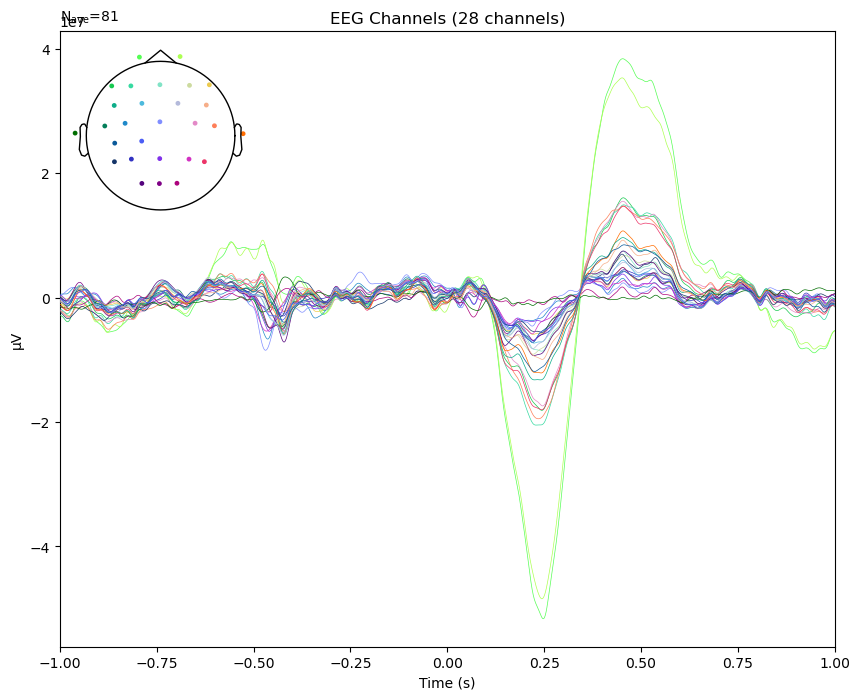

In [194]:
# ERP Plot
# extract epochs from the raw data
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)
# compute the evoked response
evoked = epochs.average()
# Plot
fig, ax = plt.subplots(figsize=(10, 8))
evoked.plot(time_unit='s', picks='eeg', titles=dict(eeg='EEG Channels'), axes=ax)
plt.close(fig)

* Now we need to map the stimuli material to each of the events in the EVENT1 column. 

    * NB - I have addded one dummy entry at the bottom of the excel file to make the stimuli count 81, otherwise the mapping will not work.

In [201]:
eeg_df = pd.read_csv("data/0014.txt", sep='\t', index_col=False, header=0)
stimuli_df = pd.read_excel("data/FacesERP_05.xls")
stimuli_df

Block      Condition
0       1  ScrambledFace
1       2    UprightFace
2       3  ScrambledFace
3       4    UprightFace
4       5   InvertedFace
..    ...            ...
76     77   InvertedFace
77     78   InvertedFace
78     79         Object
79     80         Object
80     81         Object

[81 rows x 2 columns]

In [202]:
# Define the event IDs for each condition
event_id_map = {'ScrambledFace': 1, 'UprightFace': 2, 'InvertedFace': 3, 'Object': 4}

# Create the event list based on the EVENT1 channel
events = mne.find_events(raw, stim_channel='EVENT1', shortest_event=0.1, verbose=True, initial_event=True, uint_cast=True)

# Split the groups of 120 into the event types from the stimulus data
event_type_order = stimuli_df['Condition'].tolist()
n_events = len(events)
event_order = []
for i in range(n_events):
    if events[i, -1] == 120:
        event_type = event_type_order.pop(0)
        event_id = event_id_map[event_type]
        events[i, -1] = event_id
        event_order.append(i)

# Extract epochs for each trial
tmin = -1  # start time before the event
tmax = 1  # end time after the event
baseline = None  # no baseline correction
epochs = mne.Epochs(raw, events[event_order], event_id=event_id_map, tmin=tmin, tmax=tmax, baseline=baseline, preload=True)

244 events found
Event IDs: [ 16  24  56 120]
Not setting metadata
81 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 81 events and 2001 original time points ...
0 bad epochs dropped


In [203]:
epochs

<Epochs |  81 events (all good), -1 - 1 sec, baseline off, ~35.9 MB, data loaded,
 'ScrambledFace': 20
 'UprightFace': 20
 'InvertedFace': 20
 'Object': 21>

* Now our epochs object looks really good and we can continue with the analysis.

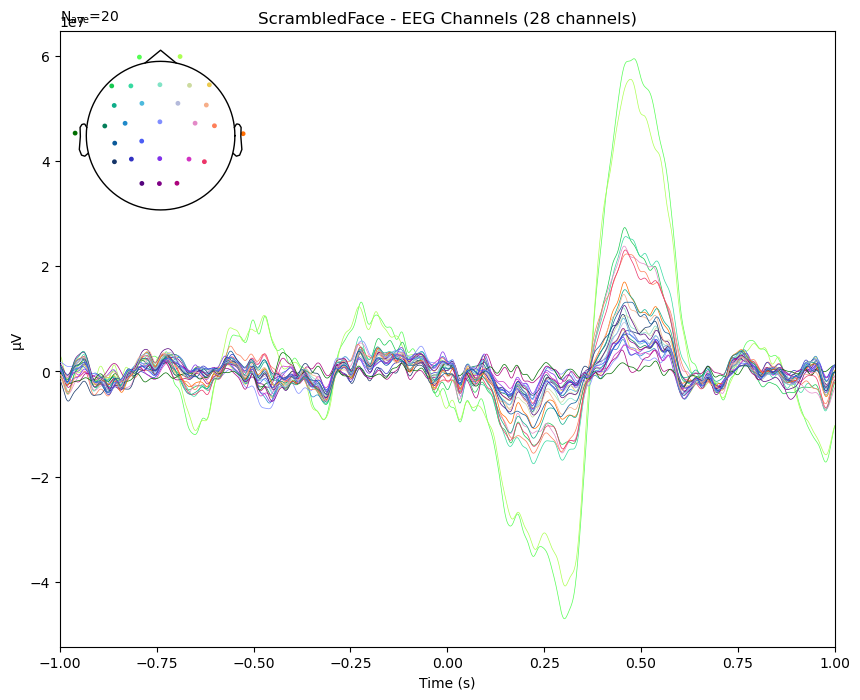

In [204]:
# Average the epochs for the 'ScrambledFace' condition
scrambled_epochs = epochs['ScrambledFace']
scrambled_evoked = scrambled_epochs.average()

# Plot the ERP waveform
fig, ax = plt.subplots(figsize=(10, 8))
scrambled_evoked.plot(time_unit='s', picks='eeg', titles=dict(eeg='ScrambledFace - EEG Channels'), axes=ax)
plt.close(fig)

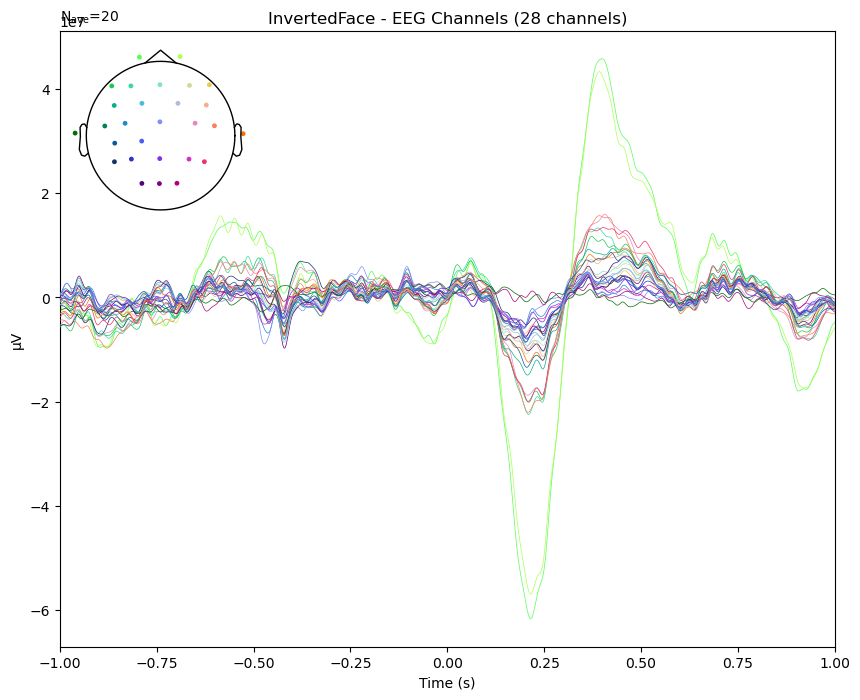

In [205]:
# Average the epochs for the 'InvertedFace' condition
scrambled_epochs = epochs['InvertedFace']
scrambled_evoked = scrambled_epochs.average()

# Plot the ERP waveform
fig, ax = plt.subplots(figsize=(10, 8))
scrambled_evoked.plot(time_unit='s', picks='eeg', titles=dict(eeg='InvertedFace - EEG Channels'), axes=ax)
plt.close(fig)

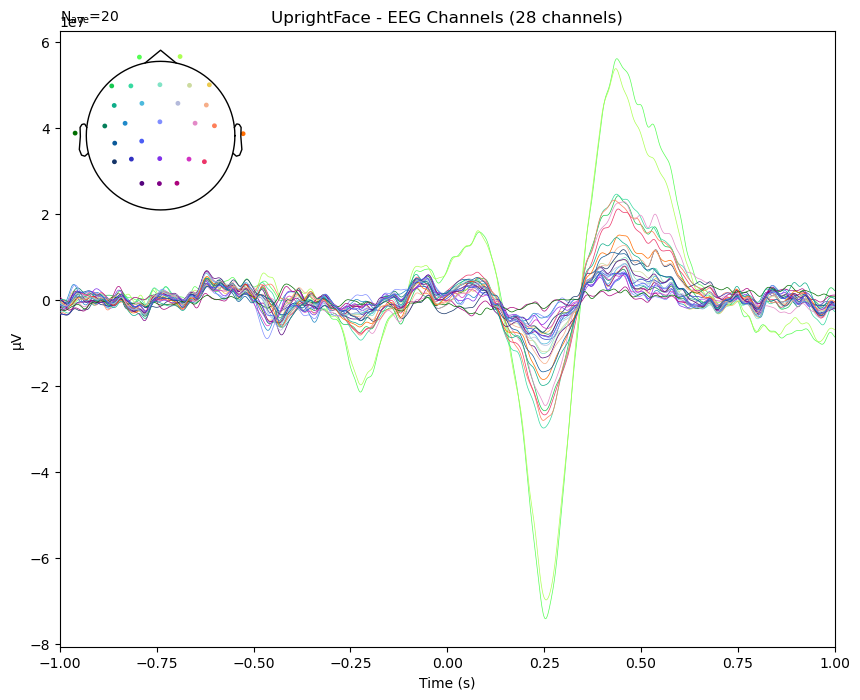

In [206]:
# Average the epochs for the 'UprightFace' condition
scrambled_epochs = epochs['UprightFace']
scrambled_evoked = scrambled_epochs.average()

# Plot the ERP waveform
fig, ax = plt.subplots(figsize=(10, 8))
scrambled_evoked.plot(time_unit='s', picks='eeg', titles=dict(eeg='UprightFace - EEG Channels'), axes=ax)
plt.close(fig)

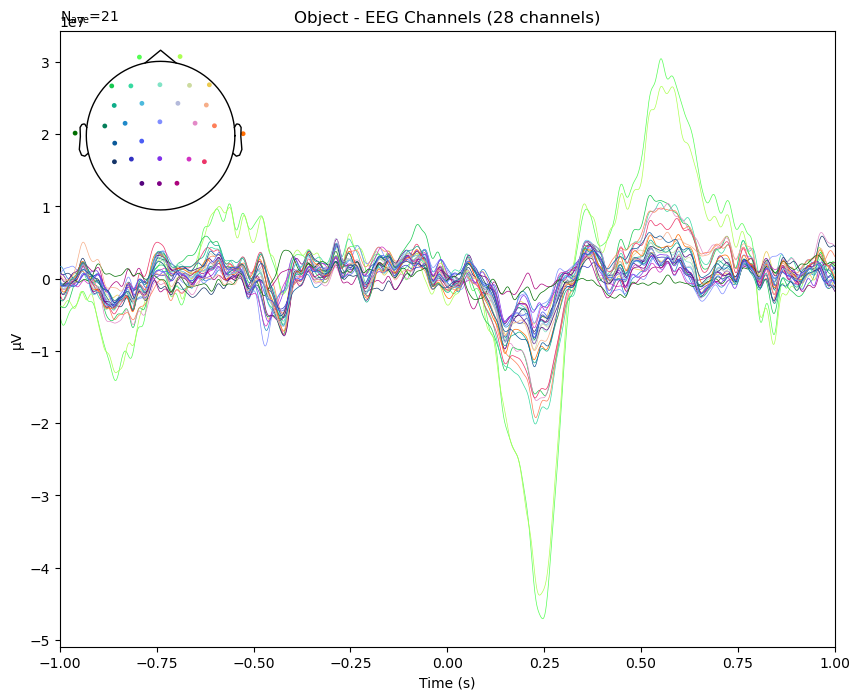

In [207]:
# Average the epochs for the 'Object' condition
scrambled_epochs = epochs['Object']
scrambled_evoked = scrambled_epochs.average()

# Plot the ERP waveform
fig, ax = plt.subplots(figsize=(10, 8))
scrambled_evoked.plot(time_unit='s', picks='eeg', titles=dict(eeg='Object - EEG Channels'), axes=ax)
plt.close(fig)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


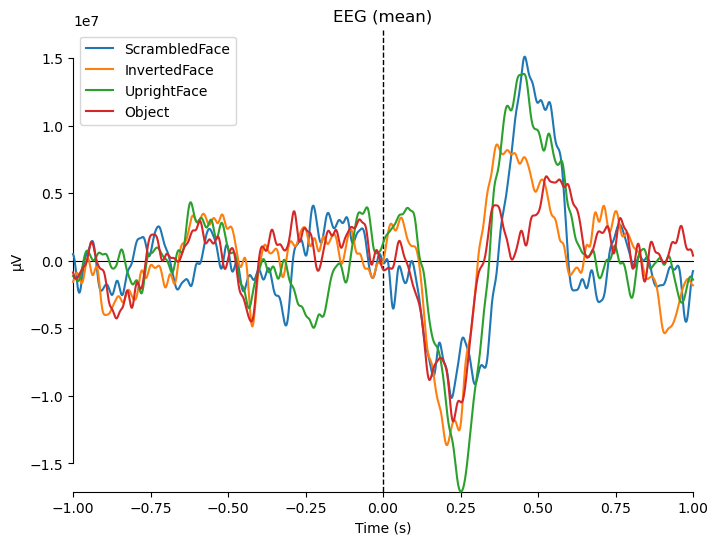

combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"


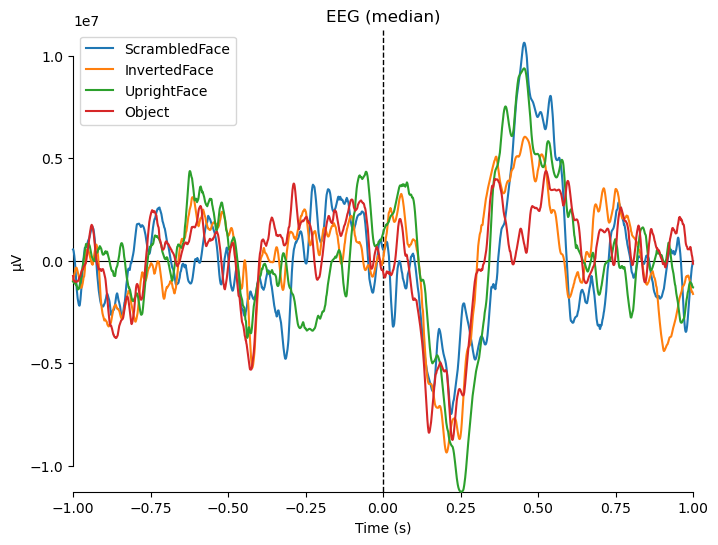

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


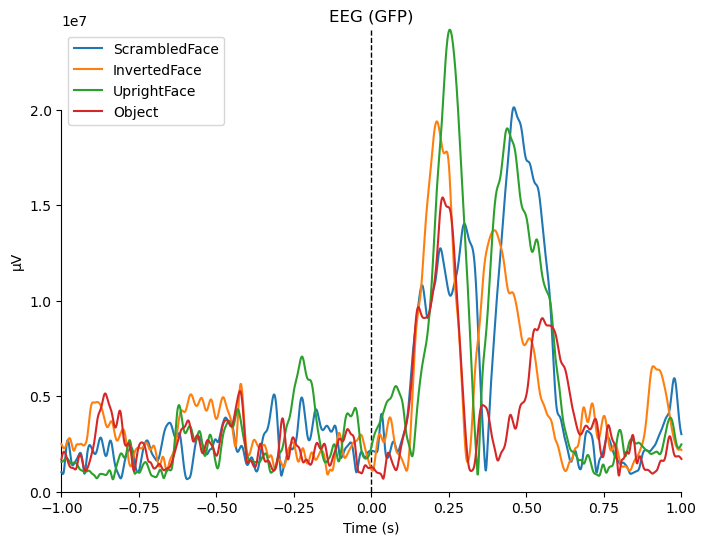

combining channels using "<function custom_func at 0x00000217B4403AC0>"
combining channels using "<function custom_func at 0x00000217B4403AC0>"
combining channels using "<function custom_func at 0x00000217B4403AC0>"
combining channels using "<function custom_func at 0x00000217B4403AC0>"


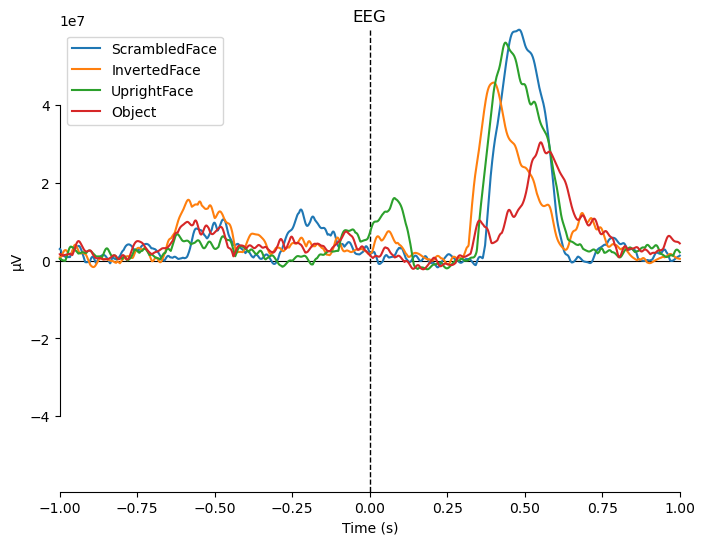

In [226]:
# Average the epochs for each condition
scrambled_epochs = epochs['ScrambledFace'].average()
inverted_epochs = epochs['InvertedFace'].average()
upright_epochs = epochs['UprightFace'].average()
object_epochs = epochs['Object'].average()

# Create a dictionary with the condition names and evoked responses
evokeds_dict = {'ScrambledFace': scrambled_epochs,
                'InvertedFace': inverted_epochs,
                'UprightFace': upright_epochs,
                'Object': object_epochs}

def custom_func(x):
    return x.max(axis=1)

for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds(evokeds_dict, picks='eeg', combine=combine)

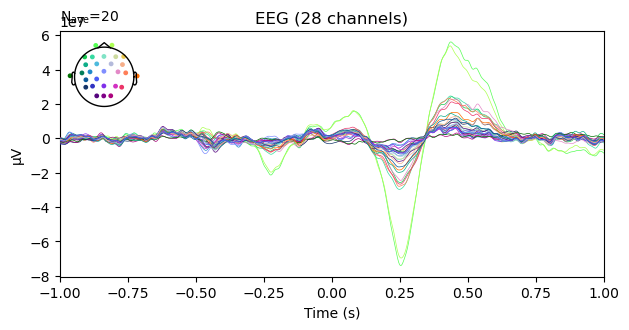

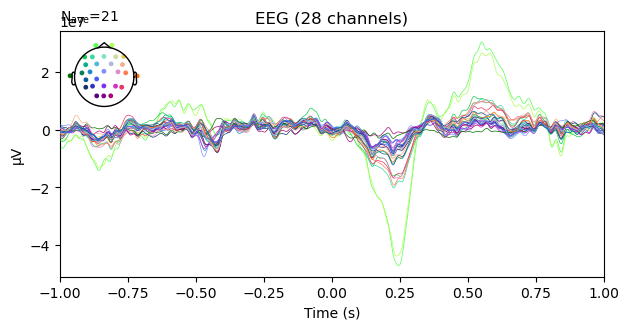

In [229]:
scrambled_epochs = epochs['ScrambledFace'].average()
inverted_epochs = epochs['InvertedFace'].average()
upright_epochs = epochs['UprightFace'].average()
object_epochs = epochs['Object'].average()


fig1 = upright_epochs.plot()
fig2 = object_epochs.plot(spatial_colors=True)

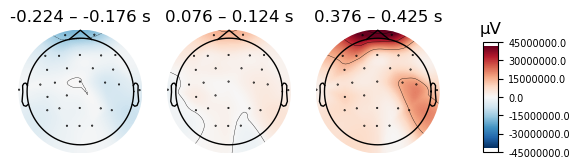

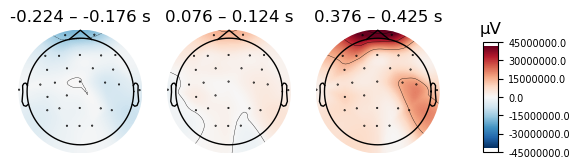

In [230]:
upright_epochs.plot_topomap(times=[-0.2, 0.1, 0.4], average=0.05)

No projector specified for this dataset. Please consider the method self.add_proj.


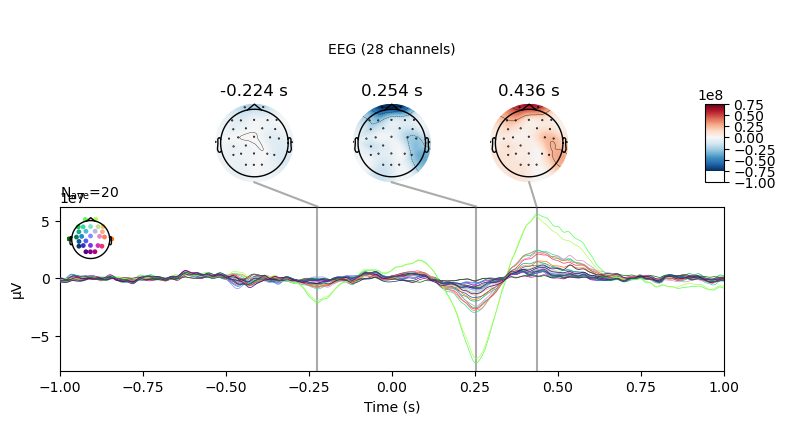

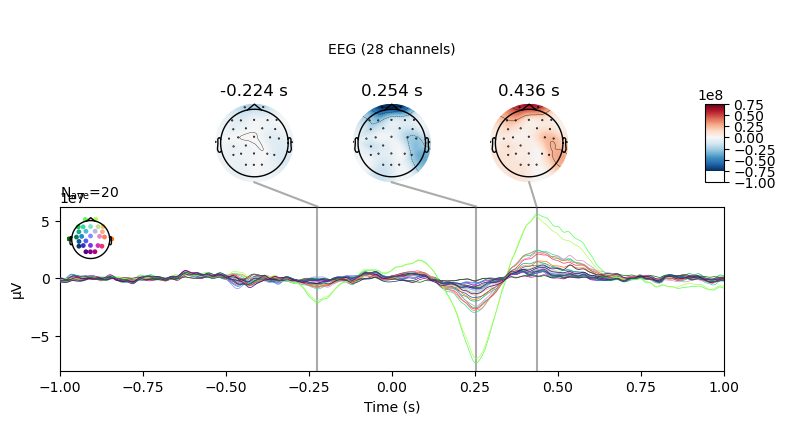

In [231]:
upright_epochs.plot_joint()


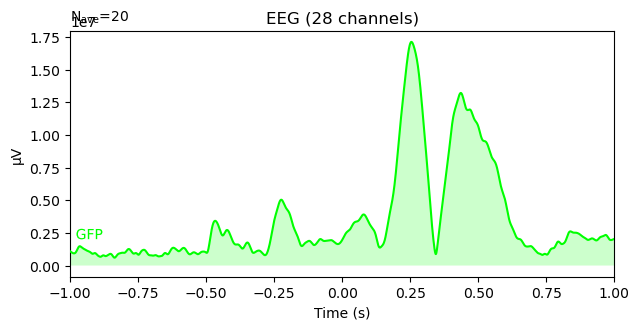

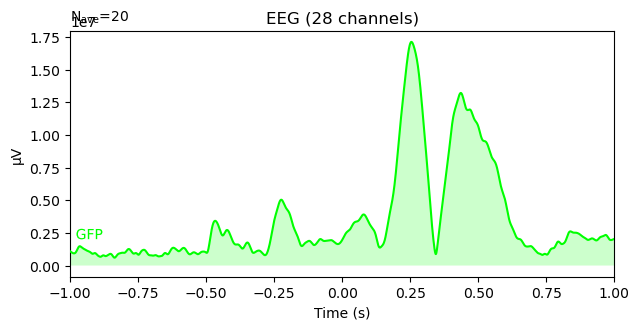

In [234]:
upright_epochs.plot(gfp='only')

In [ ]:
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2', 'A1', 'A2', 'FC5', 'FC1', 'FC2', 'FC6', 'CP5', 'CP1']

combining channels using "mean"
combining channels using "mean"


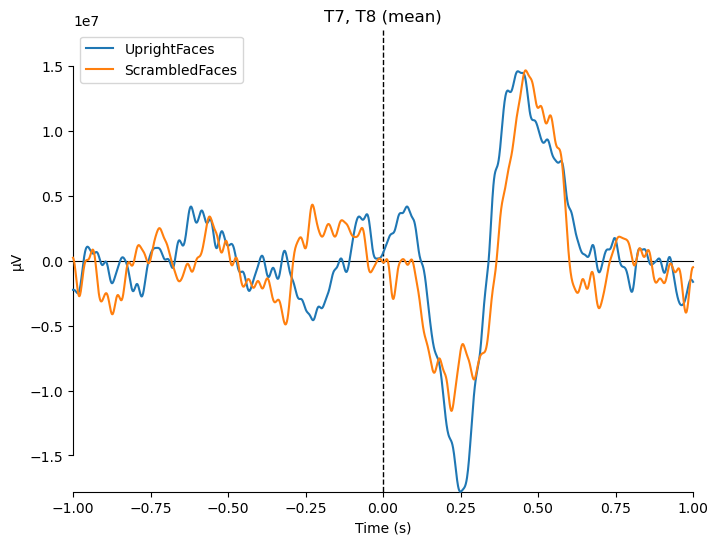

[<Figure size 800x600 with 1 Axes>]

In [239]:
evokeds = dict(UprightFaces=upright_epochs, ScrambledFaces=scrambled_epochs)
picks = ['T7', 'T8']
mne.viz.plot_compare_evokeds(evokeds, picks=picks, combine='mean')

* We can also generate confidence intervals by treating each epoch as a separate observation using iter_evoked(). A confidence interval across subjects could also be obtained by passing a list of Evoked objects (one per subject) to the plot_compare_evokeds() function.

combining channels using "mean"
combining channels using "mean"


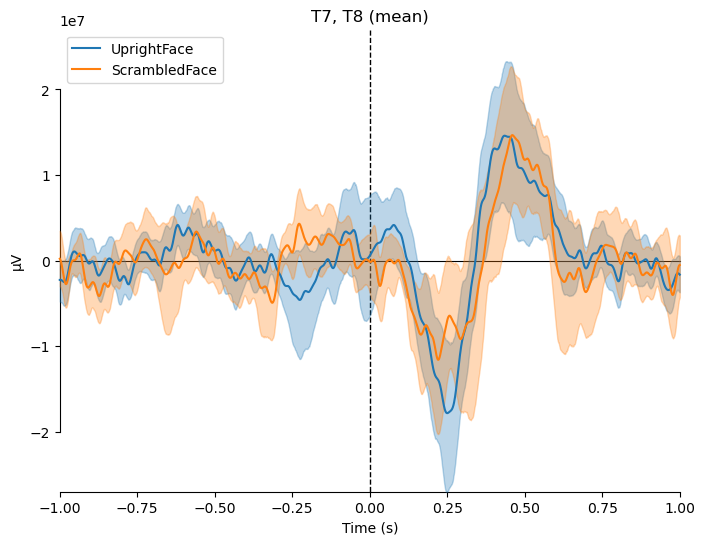

[<Figure size 800x600 with 1 Axes>]

In [242]:
evokeds = dict(UprightFace=list(epochs['UprightFace'].iter_evoked()),
               ScrambledFace=list(epochs['ScrambledFace'].iter_evoked()))
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=picks)

No projector specified for this dataset. Please consider the method self.add_proj.


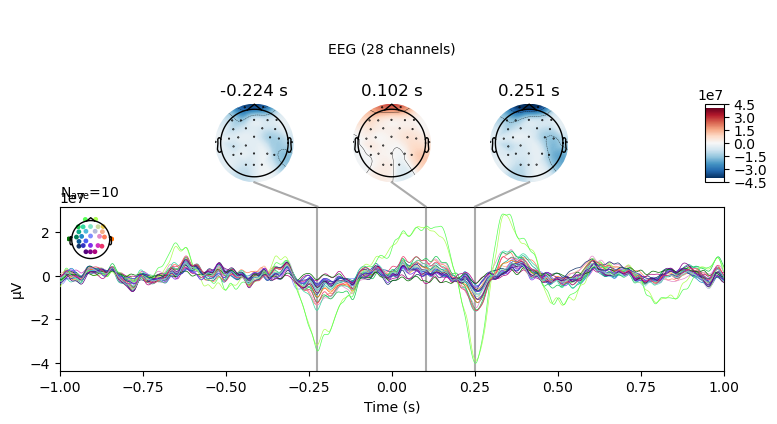

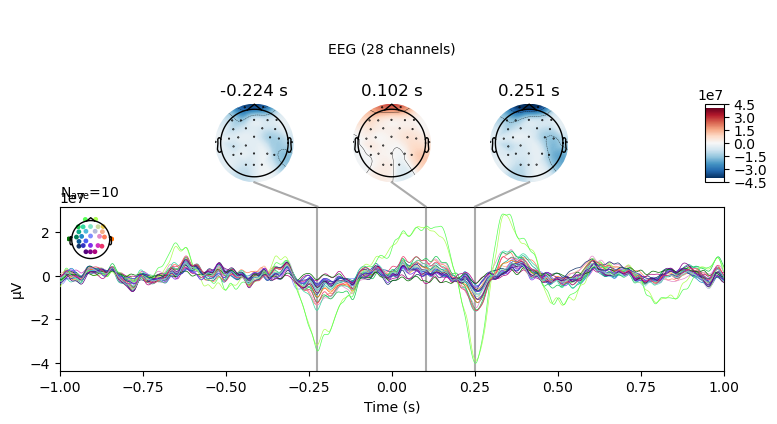

In [243]:
upright_minus_scrambled = mne.combine_evoked([upright_epochs, scrambled_epochs], weights=[1, -1])
upright_minus_scrambled.plot_joint()

* The next few cells are experiments to apply custom electrodes (montages) based on some default configurations.

In [210]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f'{montage_name}: {montage_description}')

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [124]:
easycap_montage = mne.channels.make_standard_montage('biosemi32')
print(easycap_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 32 channels>


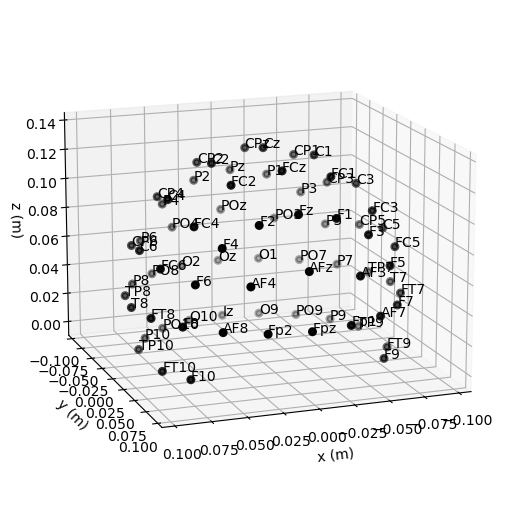

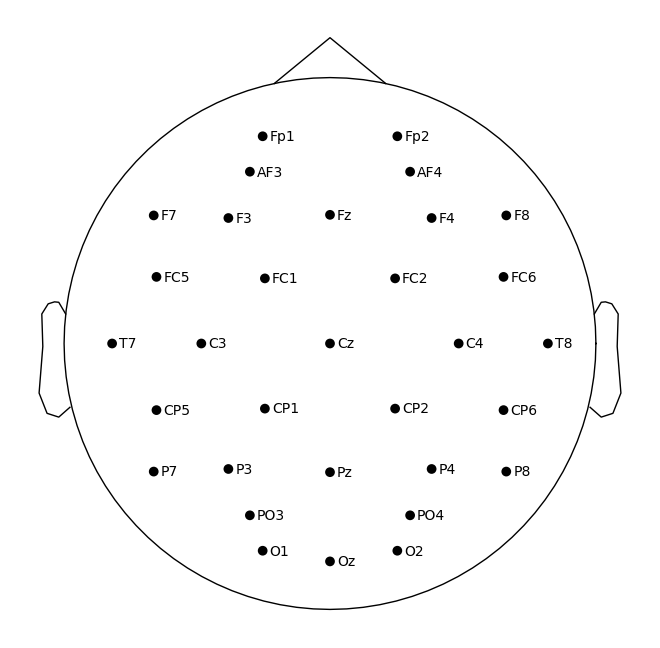

In [125]:
easycap_montage.plot()  # 2D
fig = easycap_montage.plot(kind='3d', show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

# End here

Work in progress - compute power spectrum and time frequency analysis 



* For this to work, we need to provide additional metadata related to postion of the electrodes. There are several build in function in MNE that are supposed to help but so far they seem a bit obscure and not really well defined with solid examples.

    * One approach is to define a custom mne.channels.make_standard_montage and/or mne.channels.make_dig_montage which should take a default spatial location of EEG electrodes based on their number. 

In [ ]:
# import pandas as pd
# import numpy as np
# import mne
# from mne.channels import make_standard_montage

# from scipy import signal

# df = pd.read_csv("data/0014.txt", sep='\t', index_col=False, header=0)
# df = df.iloc[:, :-1]

# # Create the MNE info object with metadata about the EEG channels
# n_channels = df.shape[1]
# ch_names = list(df.columns)
# ch_types = ['eeg'] * n_channels
# sfreq = 1000
# info = mne.create_info(ch_names, sfreq, ch_types)
# info

In [14]:
frequencies = np.arange(6, 30, 2)  # frequency range
n_cycles = 3  # number of cycles in Morlet wavelet
power = tfr_morlet(epochs, freqs=frequencies, n_cycles=n_cycles, return_itc=False)
power.plot_topo(baseline=(-0.5, 0), mode='zscore', title='Time-Frequency Plot')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


Applying baseline correction (mode: zscore)


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    8.0s finished


RuntimeError: No digitization points found.

Topographic plot

In [ ]:
evoked.plot_topomap(times=[0.1, 0.2, 0.3])

Attemp to map the stimuli details

In [39]:
stimuli_df = pd.read_excel("data/FacesERP_05.xls")
stimuli_df

Block      Condition  Exp  Exp.Sample    Stimuli
0       1  ScrambledFace   79           1   sm19.bmp
1       2    UprightFace   23           2  bwm03.bmp
2       3  ScrambledFace   65           3   sm05.bmp
3       4    UprightFace   40           4  bwm20.bmp
4       5   InvertedFace    5           5  bwi05.bmp
..    ...            ...  ...         ...        ...
75     76   InvertedFace   12          76  bwi12.bmp
76     77   InvertedFace   13          77  bwi13.bmp
77     78   InvertedFace    6          78  bwi06.bmp
78     79         Object   55          79    o15.bmp
79     80         Object   60          80    o20.bmp

[80 rows x 5 columns]